A script for running a matplotlib visualization of the shoal model. The end goal is to have a 3D visualization.

[Matplotlib simple_anim example](https://matplotlib.org/examples/animation/simple_anim.html)
[Tutorial](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

In [1]:
from shoal_model_pos_data import ShoalModel
import numpy as np
import pandas as pd

model = ShoalModel(population=100, width=100, height=100, speed=1, vision=10, separation=2)
for i in range(10):
    model.step()
data = model.datacollector.get_model_vars_dataframe()

# Get DataFrame into a form that can be exported as .csv
data = np.asarray(data)
data = data.flatten()  # one set of brackets removed....
df = pd.DataFrame(data)
output = df[0].apply(pd.Series)  # removed another set of brackets
output[0].apply(pd.Series)  # removed last brackets
np_output = np.array(output)

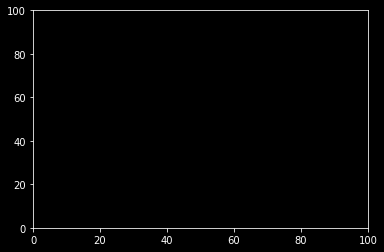

In [12]:
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
plt.style.use('dark_background')


# Set up figure, axes, and plot element
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 100))
scatter,  = ax.plot([], [], markersize=2)


# Initialization function - background of frames
def init():
    scatter.set_data([], [])
    return scatter, 


# Animation function - called sequentially
def animate(i):
    x = output[:, ::2]
    y = output[:, 1::2]
    scatter.set_data(x, y)
    return scatter,  

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20)